<a href="https://colab.research.google.com/github/eunsun53/ML_proj/blob/main/cnn_fashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical 

In [ ]:
def load_fashion_mnist():
  fashion_mnist =keras.datasets.fashion_mnist
  (train_x, train_y), (test_x, test_y) = fashion_mnist.load_data() #x에는 패션 이미지(28*28)이 각각 들어있음 

  # 이미지 픽셀이 0~1 이 되도록 정규화 
  train_x = train_x/255
  test_x = test_x/255

  # cnn 하기 위해 dimension 하나 확장 
  test_x_og = test_x
  train_x = np.expand_dims(train_x, axis = -1)
  test_x = np.expand_dims(test_x, axis = -1)

  # 0~9 레이블을 one-hot label로 바꾸기
  train_y = to_categorical(train_y)
  test_y = to_categorical(test_y)

  return train_x, train_y, test_x, test_y, test_x_og

In [ ]:
def build_cnn_model(num_classes, input_shape):
  #모델 생성 
  model = keras.Sequential()

  # cnn layers
  model.add(keras.layers.Conv2D(input_shape = input_shape, filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
  #model.add(keras.layers.Activation('relu'))
  model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
  model.add(keras.layers.Dropout(0.3))

  # 출력층 1-D로 펴주기 
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(256, activation = 'relu'))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Dense(10, activation = 'softmax'))

  return  model



Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1200/1200 [==============================] - 5s 4ms/step - loss: 0.4570 - accuracy: 0.8378 - val_loss: 0.3181 - val_accuracy: 0.8864
Epoch 2/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3205 - accuracy: 0.8838 - val_loss: 0.2893 - val_accuracy: 0.8952
Epoch 3/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2865 - accuracy: 0.8943 - val_loss: 0.2679 - val_accuracy: 0.8968
Epoch 4/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2651 - accuracy: 0.9009 - val_loss: 0.2562 - val_accuracy: 0.9048
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.2503 - accuracy: 0.9069
test accuracy: 90.690%
predict shape:  (10000, 10)
정답:  [9 2 1 ... 8 1 5]
prdict classes:  [9 2 1 ... 8 1 5]
1


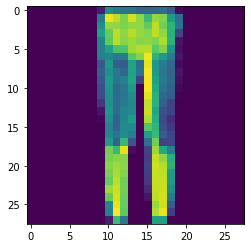

In [ ]:
def main(cnn_model = None, epochs = 5):
  #데이터 불러오기 
  train_x, train_y, test_x, test_y, test_x_og = load_fashion_mnist()
#  print('train_y[0]', train_y)
#  print('train_x[0].shape', train_x[0].shape)

  # 모델 생성
  num_classes = len(train_y[0])
  input_shape = train_x[0].shape
  model = build_cnn_model(num_classes, input_shape)

  #모델 컴파일, 학습 
  model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adam(lr = 0.001), metrics = ['accuracy']) 
  history = model.fit(train_x, train_y, batch_size = 50, epochs = 5, validation_data = (test_x, test_y))

  # 모델 정확도 평가 
  test_loss, test_acc = model.evaluate(test_x, test_y)
  print(f'test accuracy: {test_acc *100:.3f}%')

  #예측값 시각화 
  predict_out = model.predict(test_x)
  classes = np.argmax(predict_out, axis = 1) #axis = 0: 열기준 가장 큰값의 인덱스 반환, axis = 1: 행기준 
  print("predict shape: ", predict_out.shape)
  print("정답: ", np.argmax(test_y, axis = 1))
  print("prdict classes: ", classes)

  plt.imshow(test_x_og[3])
  print(classes[3])


  #시각화 
  # plt.plot(history.history['accuracy'])
  # plt.plot(history.history['val_accuracy'])
  # plt.show()


main()